<a href="https://colab.research.google.com/github/palakuriswamy/III-H-assigements-/blob/main/Copy_of_AIML_Module_1_Lab_1_Extracting_features_from_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AIML Module 1 - Lab 1
# Extracting features from data





In [ ]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [ ]:
topic1 = 'Giraffe'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like:

In [ ]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας / eléphas, « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [ ]:
print(eng1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeswerethoughttobeonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintouptoeightextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaaswellasmorphologicalmeasurementssevenotherextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffeschiefdistinguishingcharacteristicsareitsextremelylongneckandlegsitshornlikeossiconesanditsspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostotherherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliveinherdsofrelatedfemalesan

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [ ]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

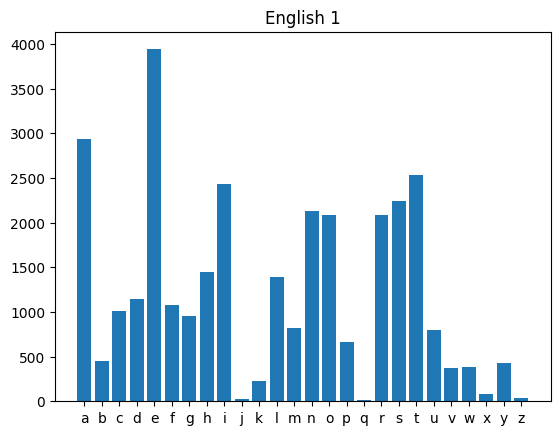

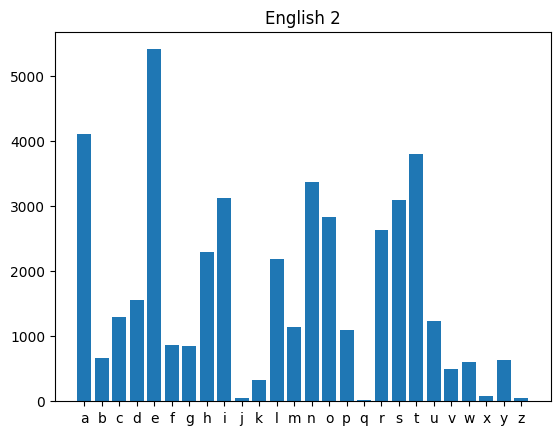

In [ ]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

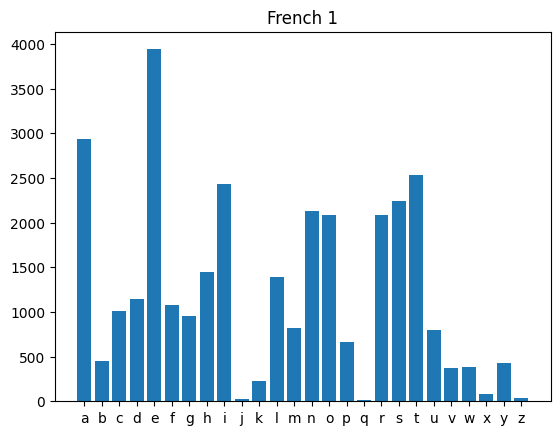

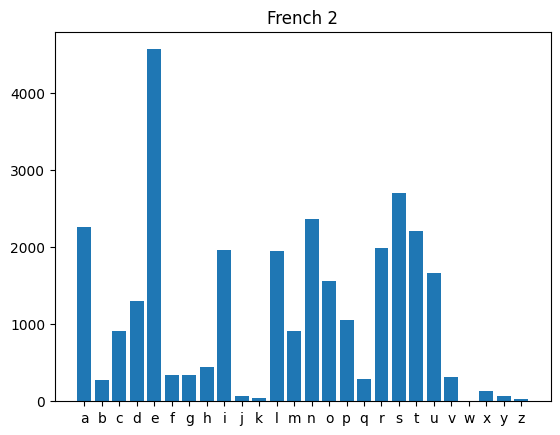

In [ ]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

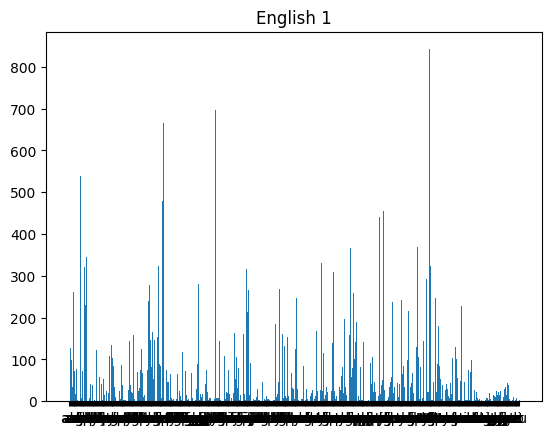

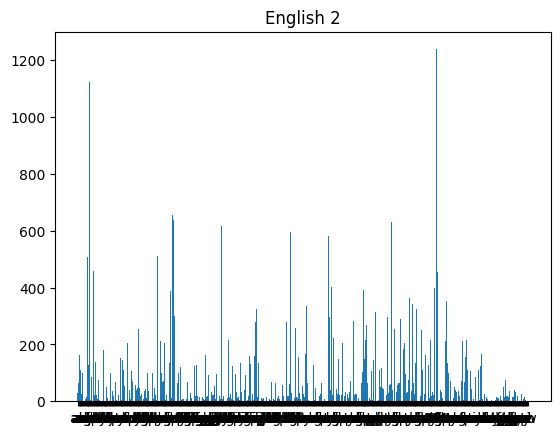

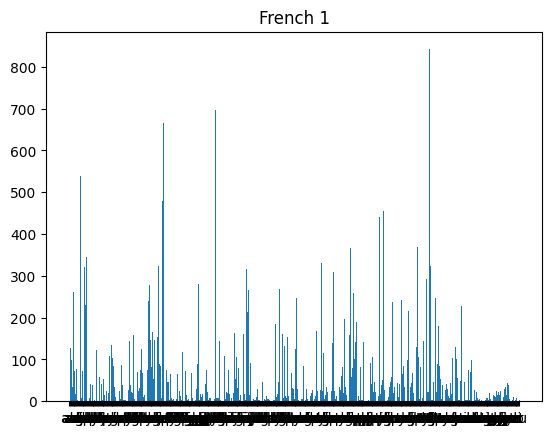

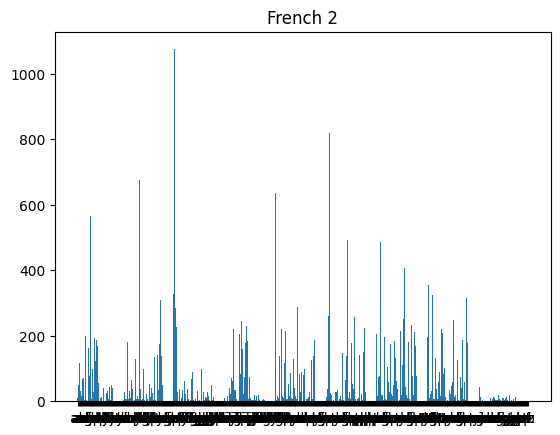

In [ ]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

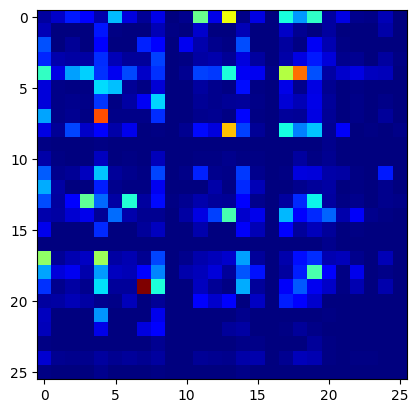

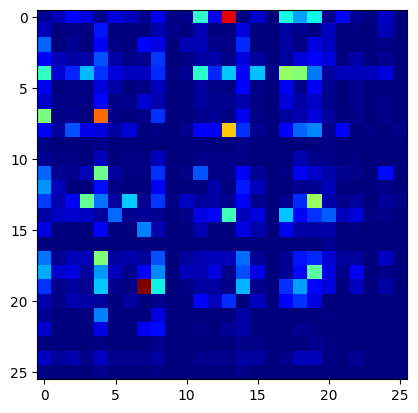

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

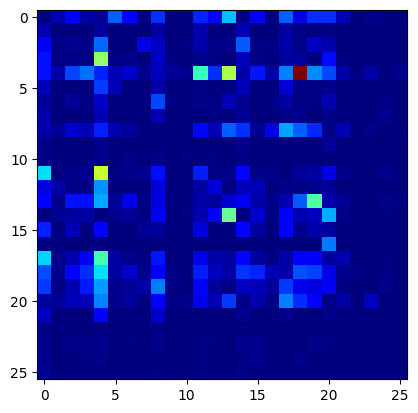

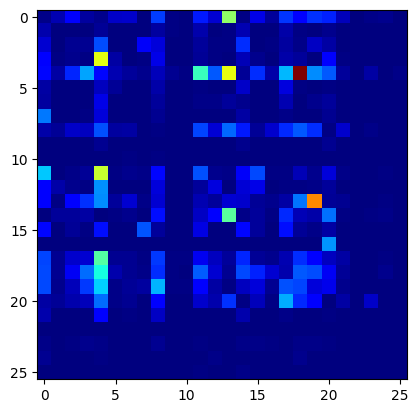

In [ ]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [ ]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 842.0
('h', 'e') : 697.0
('e', 's') : 665.0
('i', 'n') : 594.0
('a', 'n') : 538.0
('e', 'r') : 478.0
('r', 'e') : 454.0
('r', 'a') : 441.0
('a', 'l') : 404.0
('n', 'd') : 393.0

English 2:
('t', 'h') : 1238.0
('a', 'n') : 1123.0
('h', 'e') : 983.0
('i', 'n') : 863.0
('n', 't') : 664.0
('e', 'r') : 655.0
('e', 's') : 637.0
('r', 'e') : 629.0
('h', 'a') : 618.0
('l', 'e') : 597.0

French 1:
('e', 's') : 737.0
('l', 'e') : 438.0
('e', 'n') : 409.0
('d', 'e') : 390.0
('o', 'n') : 349.0
('n', 't') : 329.0
('r', 'e') : 317.0
('e', 'l') : 308.0
('l', 'a') : 254.0
('s', 'e') : 254.0

French 2:
('e', 's') : 1075.0
('n', 't') : 820.0
('e', 'n') : 678.0
('d', 'e') : 675.0
('l', 'e') : 635.0
('a', 'n') : 566.0
('o', 'n') : 492.0
('r', 'e') : 486.0
('e', 'l') : 451.0
('s', 'e') : 407.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

In [84]:
import wikipedia

topics = ['Giraffe', 'African Elephant']
languages = ['en', 'fr', 'es', 'de', 'it']
content_dict = {}

# Limit the maximum number of characters for each topic in each language
max_characters_per_topic = 2500

for lang in languages:
    wikipedia.set_lang(lang)
    content = ''

    for topic in topics:
        try:
            page_content = wikipedia.page(topic).content[:max_characters_per_topic]
            content += page_content + ' '
        except wikipedia.exceptions.PageError:
            print(f"Page found in {lang} for topic: {topic}")
        except wikipedia.exceptions.DisambiguationError:
            print(f"Ambiguous title in {lang} for topic: {topic}")

    content_dict[lang] = content

    print(f"Content in {lang}:")
    print(content_dict[lang])


Page found in en for topic: African Elephant
Content in en:
The giraffe is a large African hoofed mammal belonging to the genus Giraffa. It is the tallest living terrestrial animal and the largest ruminant on Earth. Traditionally, giraffes were thought to be one species, Giraffa camelopardalis, with nine subspecies. Most recently, researchers proposed dividing them into up to eight extant species due to new research into their mitochondrial and nuclear DNA, as well as morphological measurements. Seven other extinct species of Giraffa are known from the fossil record.
The giraffe's chief distinguishing characteristics are its extremely long neck and legs, its horn-like ossicones, and its spotted coat patterns. It is classified under the family Giraffidae, along with its closest extant relative, the okapi. Its scattered range extends from Chad in the north to South Africa in the south, and from Niger in the west to Somalia in the east. Giraffes usually inhabit savannahs and woodlands. Th

In [85]:
import wikipedia
import string
import re

# Function to clean up text
def clean_text(text):
    # Remove special characters, punctuation, and extra whitespace
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

topics = ['Giraffe', 'African Elephant']
languages = ['en', 'fr', 'es', 'de', 'it']
content_dict = {}

# Limit the maximum number of characters for each topic in each language
max_characters_per_topic = 2500

for lang in languages:
    wikipedia.set_lang(lang)
    content = ''

    for topic in topics:
        try:
            page_content = wikipedia.page(topic).content[:max_characters_per_topic]
            cleaned_content = clean_text(page_content)
            content += cleaned_content + ' '
        except wikipedia.exceptions.PageError:
            print(f"Page not found in {lang} for topic: {topic}")
        except wikipedia.exceptions.DisambiguationError:
            print(f"Ambiguous title in {lang} for topic: {topic}")

    content_dict[lang] = content

    print(f"Cleaned Content in {lang}:")
    print(content_dict[lang])


Page not found in en for topic: African Elephant
Cleaned Content in en:
The giraffe is a large African hoofed mammal belonging to the genus Giraffa It is the tallest living terrestrial animal and the largest ruminant on Earth Traditionally giraffes were thought to be one species Giraffa camelopardalis with nine subspecies Most recently researchers proposed dividing them into up to eight extant species due to new research into their mitochondrial and nuclear DNA as well as morphological measurements Seven other extinct species of Giraffa are known from the fossil record The giraffes chief distinguishing characteristics are its extremely long neck and legs its hornlike ossicones and its spotted coat patterns It is classified under the family Giraffidae along with its closest extant relative the okapi Its scattered range extends from Chad in the north to South Africa in the south and from Niger in the west to Somalia in the east Giraffes usually inhabit savannahs and woodlands Their food 

2.The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia



Using unrelated topics results in diverse and unrelated content.
Text from different sources may vary in format and quality, requiring code adaptation.
Different topics may demand specialized analysis techniques.
Data cleaning and preprocessing levels may vary based on data source.
Multilingual analysis introduces additional complexity.
Data integration from various sources can be complex but yields valuable insights.
Clear objectives are crucial for measuring the success of your analysis.

       EXAMPLE: Analyzing Data Science and AI/ML text entails handling diverse content from different sources. While Data Science focuses on data analysis and business insights, AI/ML delves into advanced algorithms and deep learning. Specialized analysis and language-specific tools are required, and clear objectives are essential for meaningful insights. Success is measured by achieving specific analysis goals in these intricate domains.
 Source: Social media data from platforms like Twitter, Facebook, and Instagram
         Etc...
       

3.How can we use and visualize trigrams and higher n-grams?

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


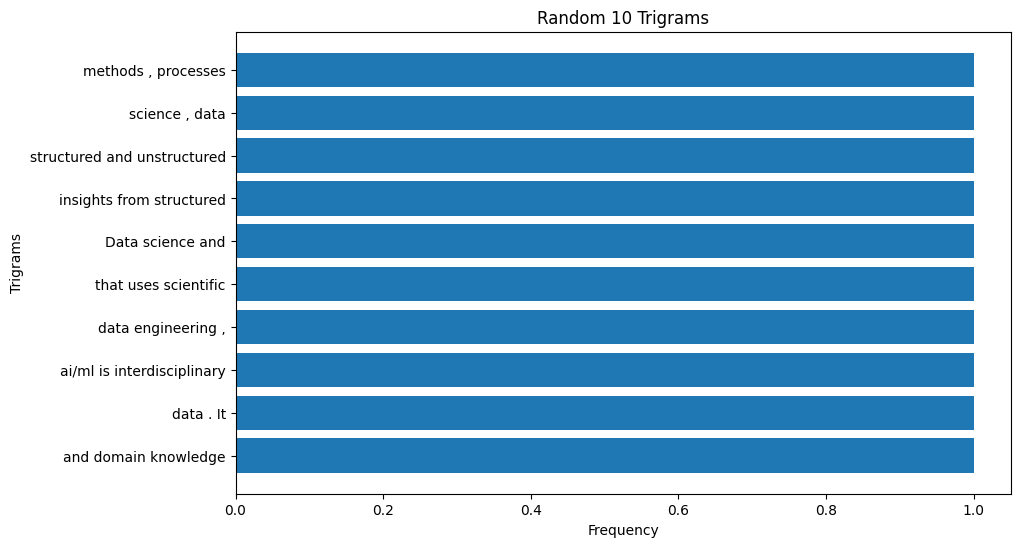

In [ ]:
#3.How can we use and visualize trigrams and higher n-grams?

''' Analyzing and visualizing trigrams and higher n-grams is a crucial aspect of text analysis.
 It involves breaking down text into units, counting their frequencies, and using visualizations like bar charts and word clouds to gain insights into linguistic patterns.
  These techniques help uncover hidden structures and patterns within textual data, aiding in natural language processing and machine learning tasks.'''


import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import random

nltk.download('punkt')

text = "Data science and ai/ml is  interdisciplinary field that uses scientific methods, processes, algorithms, and systems to extract knowledge and insights from structured and unstructured data. It combines various aspects of statistics, computer science, data engineering, and domain knowledge to analyze complex data sets."

tokens = nltk.word_tokenize(text)

trigrams = list(ngrams(tokens, 3))

trigram_freq = Counter(trigrams)

random_trigram_keys = random.sample(list(trigram_freq.keys()), 10)

random_trigrams = [(key, trigram_freq[key]) for key in random_trigram_keys]

formatted_trigrams = [' '.join(trigram) for trigram, _ in random_trigrams]

frequencies = [frequency for _, frequency in random_trigrams]

plt.figure(figsize=(10, 6))
plt.barh(formatted_trigrams, frequencies)
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.title('Random 10 Trigrams')
plt.gca().invert_yaxis()
plt.show()


# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [ ]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

Extract a subset of the data for our experiment:

In [ ]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

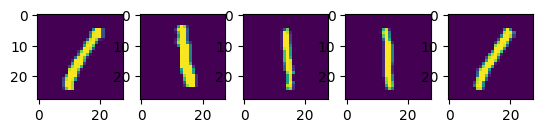

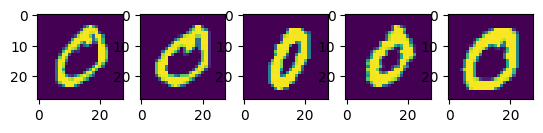

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [ ]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

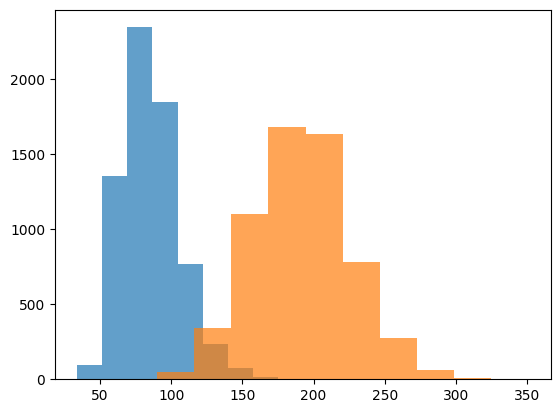

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

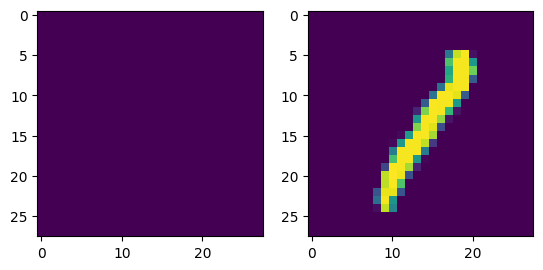

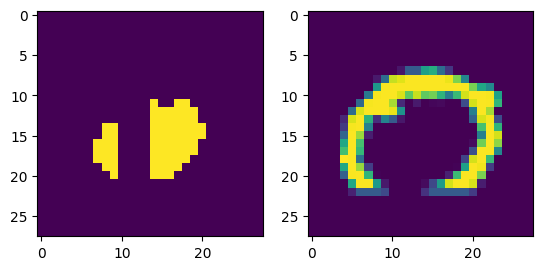

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

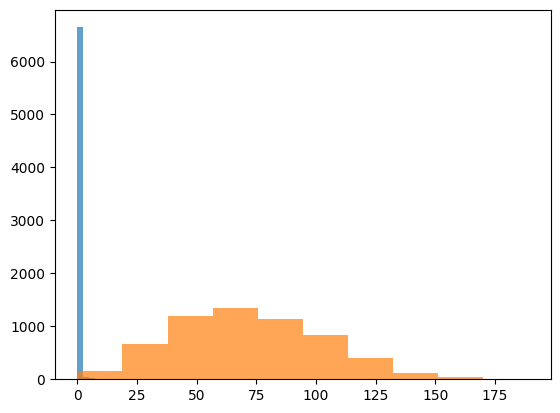

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

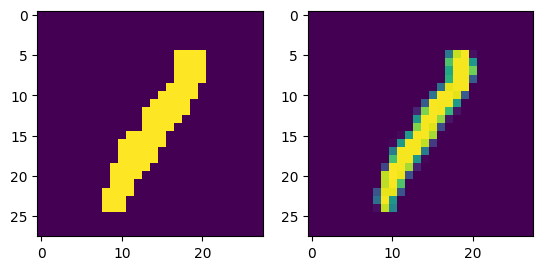

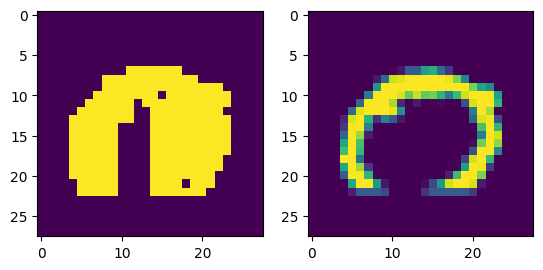

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

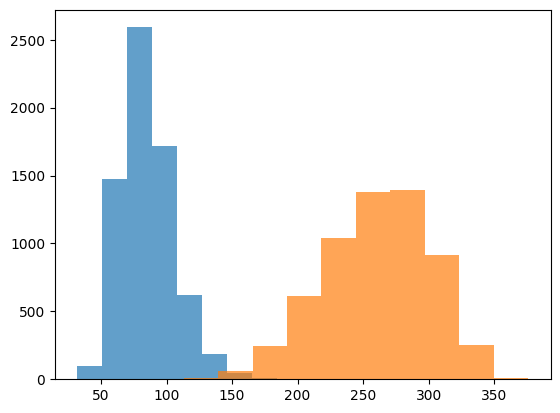

In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

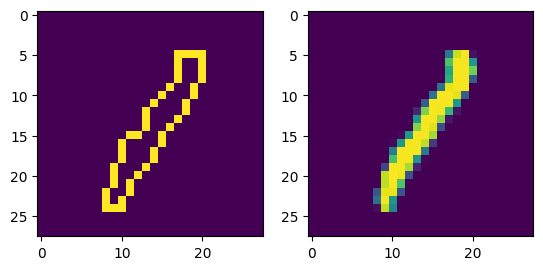

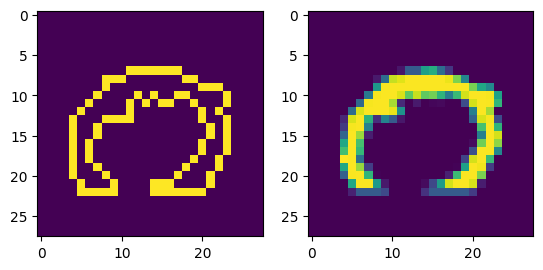

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

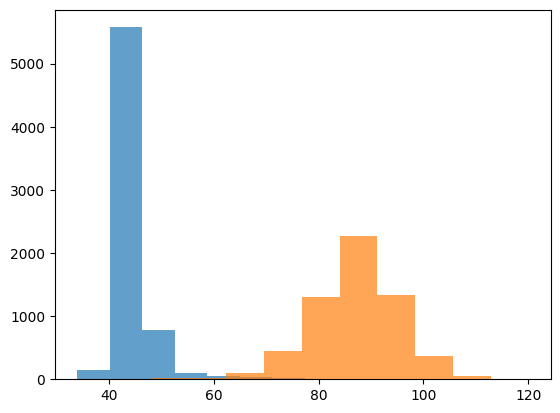

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

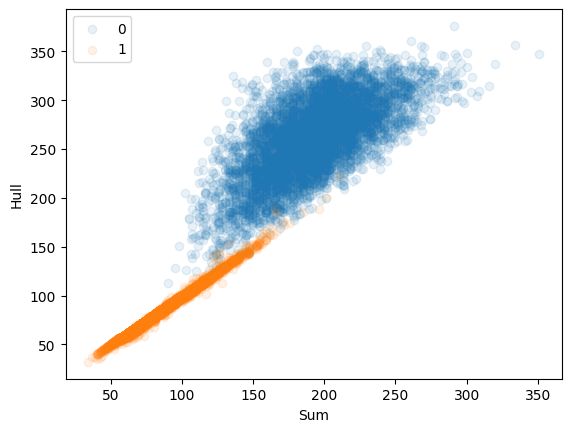

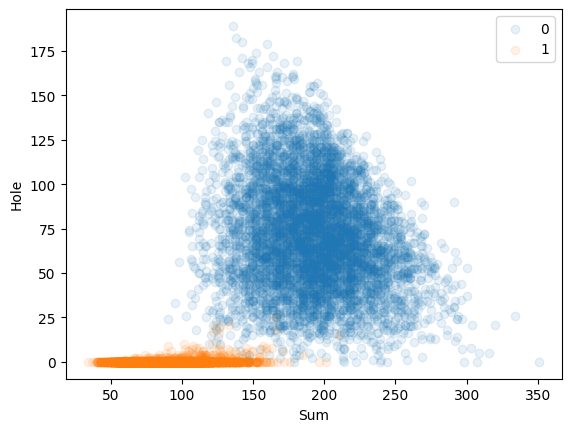

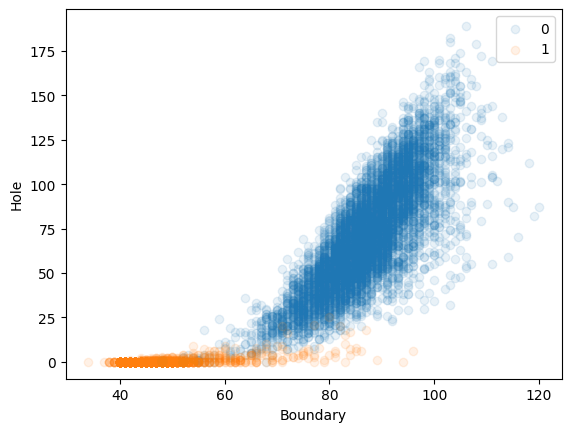

In [ ]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [ ]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

1.Which is the best combination of features?

Accoding to above information analyzes image features for the digits 0 and 1 in the MNIST dataset.
Features include the sum of pixel values, hole pixels, hull pixels, and boundary pixels.
The code generates histograms and visualizations for these features.
However, it doesn't explicitly identify the best combination of features.
Determining the best feature combination typically requires feature engineering, model training, and evaluation.
The optimal combination may vary depending on the specific classification task and dataset.
Finding the best features often involves iterative experimentation.

  example:Feature selection plays a pivotal role across diverse domains, enabling precise modeling. It's crucial in NLP, healthcare, and finance by choosing relevant factors for sentiment analysis, disease prediction, and credit scoring. Likewise, recommendation systems, quality control, and social media analytics rely on selected features, while genomics, astronomy, and climate science leverage feature selection for meaningful insights.

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

data = pd.DataFrame({
    'SentimentScore': [0.8, 0.6, 0.3, 0.9, 0.2],
    'Age': [35, 42, 28, 56, 22],
    'CreditScore': [720, 650, 600, 780, 590],
    'ProductPrice': [50, 60, 30, 70, 25],
    'Gene1': [1.2, 0.8, 1.5, 0.7, 1.0],
    'StarBrightness': [7.8, 6.5, 8.0, 7.2, 5.5],
    'Temperature': [25, 30, 22, 28, 20],
    'Humidity': [45, 50, 40, 55, 35]
})

target = pd.Series([1, 1, 0, 1, 0])

selector = SelectKBest(score_func=f_classif, k=3)
selected_features = selector.fit_transform(data, target)

print("Selected Features:")
print(data.columns[selector.get_support()])


Selected Features:
Index(['SentimentScore', 'ProductPrice', 'Temperature'], dtype='object')


2.How would you test or visualize four or more features?



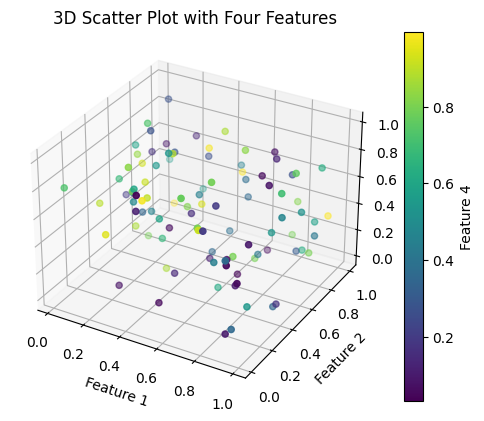

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
data = np.random.rand(100, 4)
X = data[:, :3]  # The first three columns are the features
color_feature = data[:, 3]  # The fourth column will be used for color-coding points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color_feature, cmap='viridis')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Scatter Plot with Four Features')
plt.colorbar(scatter, label='Feature 4')
plt.show()


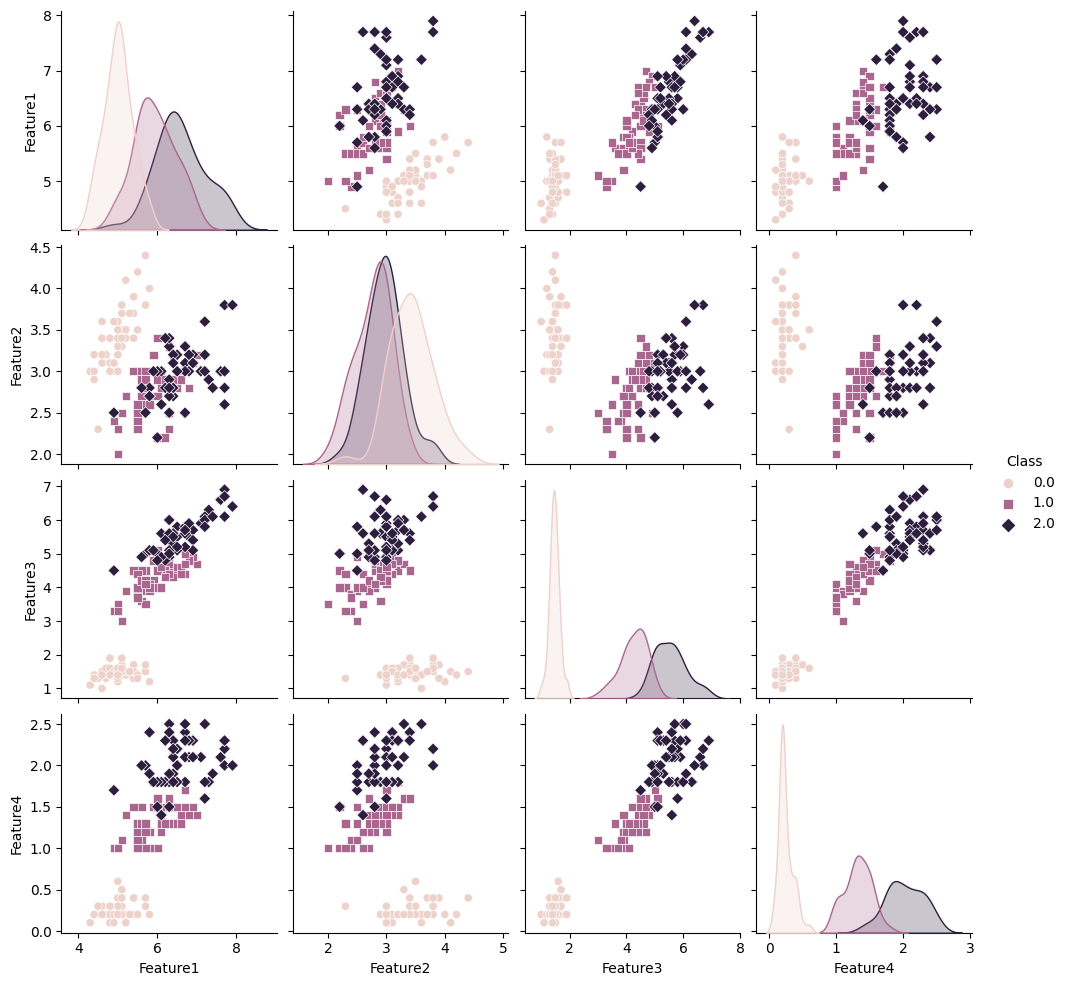

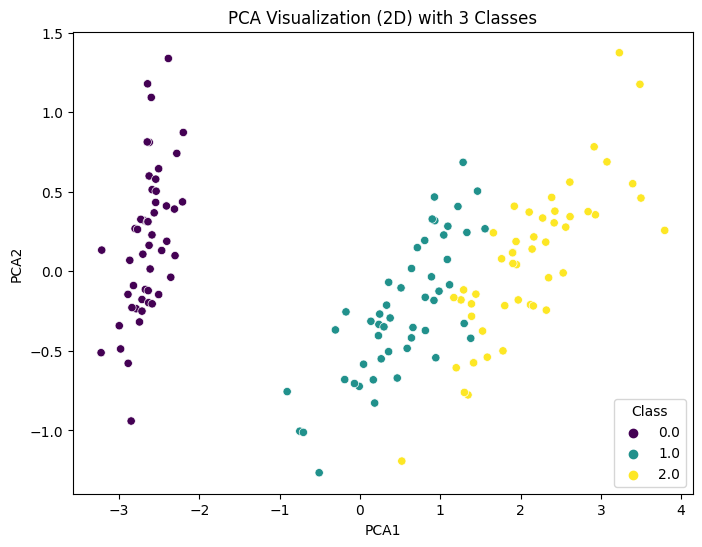

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

data = load_iris()
X = data.data
y = data.target

class_names = ['Class 0', 'Class 1', 'Class 2']

df = pd.DataFrame(data=np.c_[X, y], columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Class'])

sns.pairplot(df, hue='Class', markers=['o', 's', 'D'], hue_order=class_names)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(data=np.c_[X_pca, y], columns=['PCA1', 'PCA2', 'Class'])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Class', palette='viridis', markers=['o', 's', 'D'], hue_order=class_names)
plt.title('PCA Visualization (2D) with 3 Classes')
plt.show()


3.Can you come up with your own features?

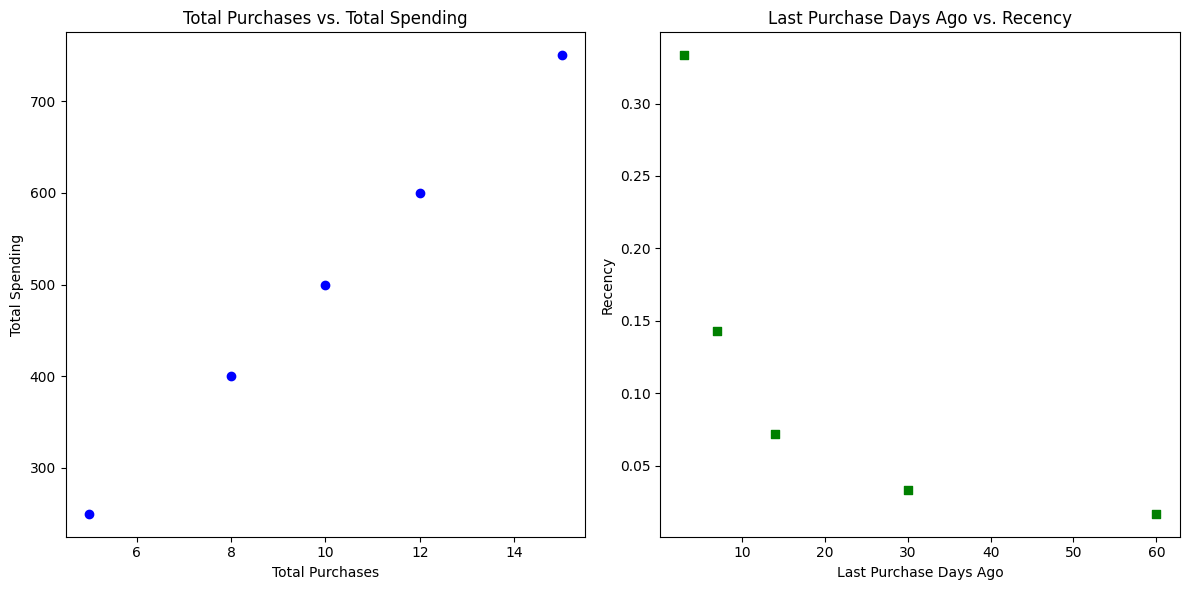

   CustomerID  Total_Purchases  Total_Spending  Last_Purchase_Days_Ago  \
0         101               10             500                       7   
1         102               15             750                      14   
2         103                5             250                      30   
3         104                8             400                       3   
4         105               12             600                      60   

  Preferred_Category  Average_Purchase_Value   Recency  High_Value_Customer  
0        Electronics                    50.0  0.142857                False  
1           Clothing                    50.0  0.071429                 True  
2              Books                    50.0  0.033333                False  
3        Electronics                    50.0  0.333333                False  
4        Electronics                    50.0  0.016667                False  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {
    'CustomerID': [101, 102, 103, 104, 105],
    'Total_Purchases': [10, 15, 5, 8, 12],
    'Total_Spending': [500, 750, 250, 400, 600],
    'Last_Purchase_Days_Ago': [7, 14, 30, 3, 60],
    'Preferred_Category': ['Electronics', 'Clothing', 'Books', 'Electronics', 'Electronics']
}

df = pd.DataFrame(data)

df['Average_Purchase_Value'] = df['Total_Spending'] / df['Total_Purchases']
df['Recency'] = 1 / df['Last_Purchase_Days_Ago']

threshold = 600
df['High_Value_Customer'] = df['Total_Spending'] > threshold

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['Total_Purchases'], df['Total_Spending'], c='blue', marker='o')
plt.xlabel('Total Purchases')
plt.ylabel('Total Spending')
plt.title('Total Purchases vs. Total Spending')

plt.subplot(1, 2, 2)
plt.scatter(df['Last_Purchase_Days_Ago'], df['Recency'], c='green', marker='s')
plt.xlabel('Last Purchase Days Ago')
plt.ylabel('Recency')
plt.title('Last Purchase Days Ago vs. Recency')

plt.tight_layout()
plt.show()

print(df)


4.Will these features work for different classes other than 0 and 1?


 Yes,From above example these features can potentially work for different classes other than 0 and 1. The features created in the code, such as Average_Purchase_Value, Recency, and the High_Value_Customer binary flag, are not limited to specific class values. They are derived from continuous or categorical customer data and can be used for various classes or categories of customers.

These features could be applied to classify or analyze customers based on different criteria or class labels, depending on the specific business problem or application. For example, if you have customer data for multiple product categories, you can use these features to classify customers into different category preferences or analyze customer behavior across various classes.

EXAMPLE CODE IS SAME AS ABOVE PROBLEM..

5.What will happen if we take more that two classes at a time?

When dealing with more than two classes in a classification problem:

Multi-class classification involves categorizing data into more than two classes or categories.
Common machine learning algorithms used for multi-class classification include logistic regression, decision trees, random forests, and neural networks.
Evaluation metrics such as accuracy, precision, recall, and F1-score help assess the model's performance in multi-class problems.
Handling class imbalance and using techniques like one-hot encoding for class labels are important considerations in multi-class classification tasks.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=data.target_names)

print(f"Accuracy: {accuracy:.2f}")
print(report)


Accuracy: 1.00
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

